In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch as th

In [3]:
from lib.functional.generate_heatmaps import GenerateHeatmaps

In [18]:
device = 'cpu'
# device = 'cuda:0'

device = th.device(device)
th.manual_seed(2)
batch_size = 1
num_joints = 3

image_size = 256
heatmap_size = 64
sigma = 5

joints = th.tensor([[[45, 145], [80, 95], [150, 105]]], dtype=th.float32)

joints = joints.to(device)
joints_mask = th.ones(batch_size, num_joints, dtype=th.bool) # visibility mask

In [19]:
gen_hmaps = GenerateHeatmaps(image_size=(image_size, image_size),
                             heatmap_size=(heatmap_size, heatmap_size), sigma=sigma)

In [20]:
heatmaps = gen_hmaps(joints, joints_mask)

In [21]:
joints_, heatmaps_ = joints[0].detach().cpu(), heatmaps[0].detach().cpu()

In [67]:
init_pos = th.tensor([[85, 170], [170, 170], [128, 85]], dtype=th.float32)

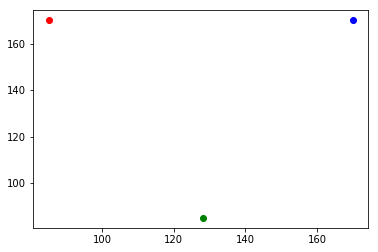

In [68]:
plt.scatter(init_pos[0,0], init_pos[0,1], c='red')
plt.scatter(init_pos[1,0], init_pos[1,1], c='blue')
plt.scatter(init_pos[2,0], init_pos[2,1], c='green')

In [58]:
im = th.cat((heatmaps_[0].unsqueeze(-1), th.cat((heatmaps_[1].unsqueeze(-1), heatmaps_[2].unsqueeze(-1)), -1)), -1)
im.shape

torch.Size([64, 64, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


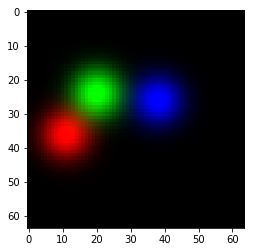

In [64]:
plt.imshow(im*170)

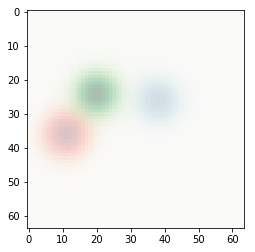

In [50]:
im1 = plt.imshow(heatmaps_[0], alpha=0.33, cmap='Reds')
im2 = plt.imshow(heatmaps_[1], alpha=0.33, cmap='Greens')
im3 = plt.imshow(heatmaps_[2], alpha=0.33, cmap='Blues')
plt.show()